In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

file_path = '../ml_data/ttv_detection_data.npz' 
data = np.load(file_path)

In [4]:
with np.load(file_path) as data:
    X = data['X']
    
    plt.figure(figsize=(12, 6))
    plt.plot(X[0].flatten(), 'k-', markersize=1) 
    plt.xlabel('Sample Index')
    plt.ylabel('Segment Flux')
    plt.title('First Segment of TCN Input')
    plt.grid(True)
    plt.show()

ValueError: EOF: reading array data, expected 262144 bytes got 0

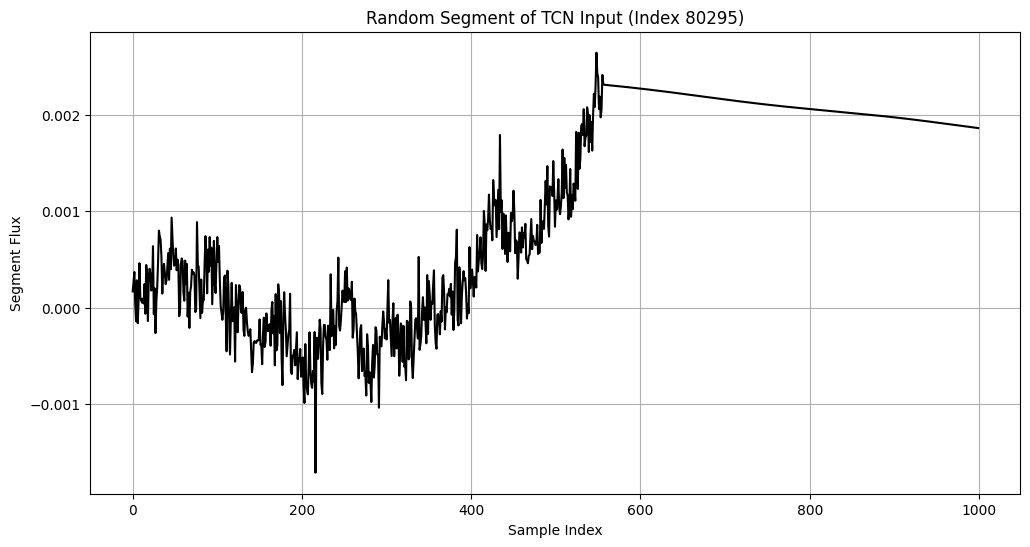

In [6]:
with np.load(file_path) as data:
    X = data['X']
    
    idx = random.randint(0, X.shape[0] - 1)
    plt.figure(figsize=(12, 6))
    plt.plot(X[idx].flatten(), 'k-', markersize=1) 
    plt.xlabel('Sample Index')
    plt.ylabel('Segment Flux')
    plt.title(f'Random Segment of TCN Input (Index {idx})')
    plt.grid(True)
    plt.show()

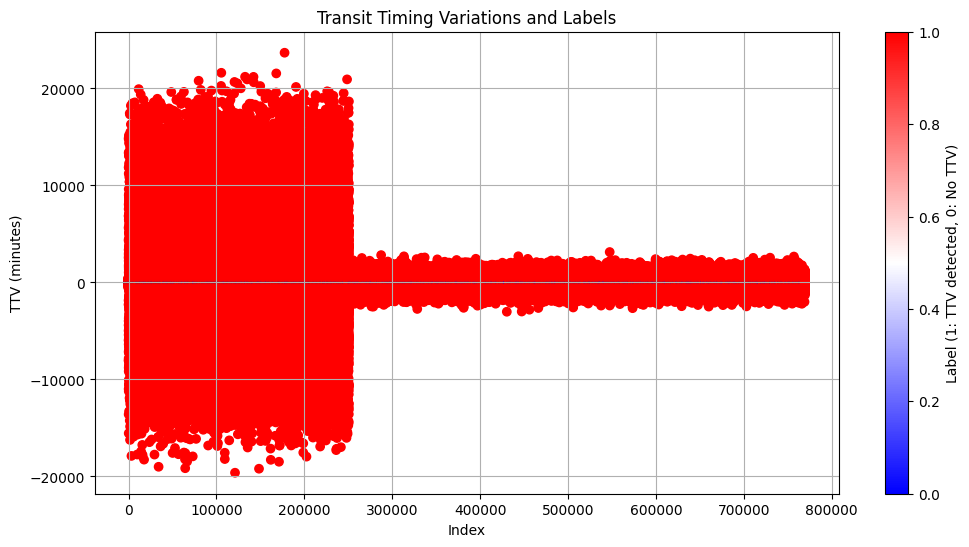

In [7]:
with np.load(file_path) as data:
    y = data['y']
    ttvs = data['ttvs']
    
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(ttvs)), ttvs, c=y, cmap='bwr', marker='o')
    plt.colorbar(label='Label (1: TTV detected, 0: No TTV)')
    plt.xlabel('Index')
    plt.ylabel('TTV (minutes)')
    plt.title('Transit Timing Variations and Labels')
    plt.grid(True)
    plt.show()

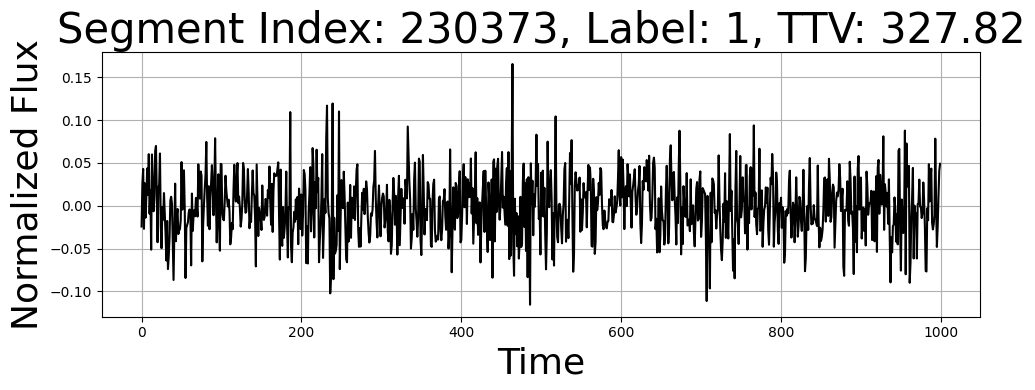

In [7]:
data = np.load(file_path)
X = data['X']
y = data['y']
ttvs = data['ttvs']

X = (X - np.mean(X)) / np.std(X)

# idx = random.randint(0, X.shape[0] - 1)
idx = 230373

plt.figure(figsize=(10, 4))
plt.plot(X[idx].flatten(), 'k-', markersize=1)
plt.title(f'Segment Index: {idx}, Label: {y[idx]}, TTV: {ttvs[idx]:.2f}', fontsize=30)
plt.xlabel('Time', fontsize=26)
plt.ylabel('Normalized Flux', fontsize=26)
plt.grid(True)
plt.tight_layout()

plt.savefig('input_segment2.png')

plt.show()


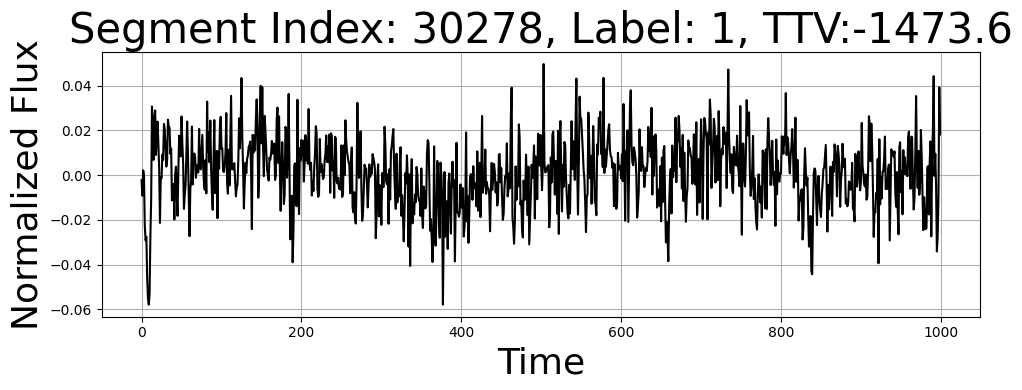

In [10]:
file_path = '../ml_data/ttv_detection_data.npz' 
data = np.load(file_path)
X = data['X']
y = data['y']
ttvs = data['ttvs']

X = (X - np.mean(X)) / np.std(X)

idx = 30278

plt.figure(figsize=(10, 4))
plt.plot(X[idx].flatten(), 'k-', markersize=1)
plt.title(f'Segment Index:{idx}, Label:{y[idx]}, TTV:{ttvs[idx]:.1f}', fontsize=30)
plt.xlabel('Time', fontsize=26)
plt.ylabel('Normalized Flux', fontsize=26)
plt.grid(True)
plt.tight_layout()

plt.savefig('input_segment.png')

plt.show()

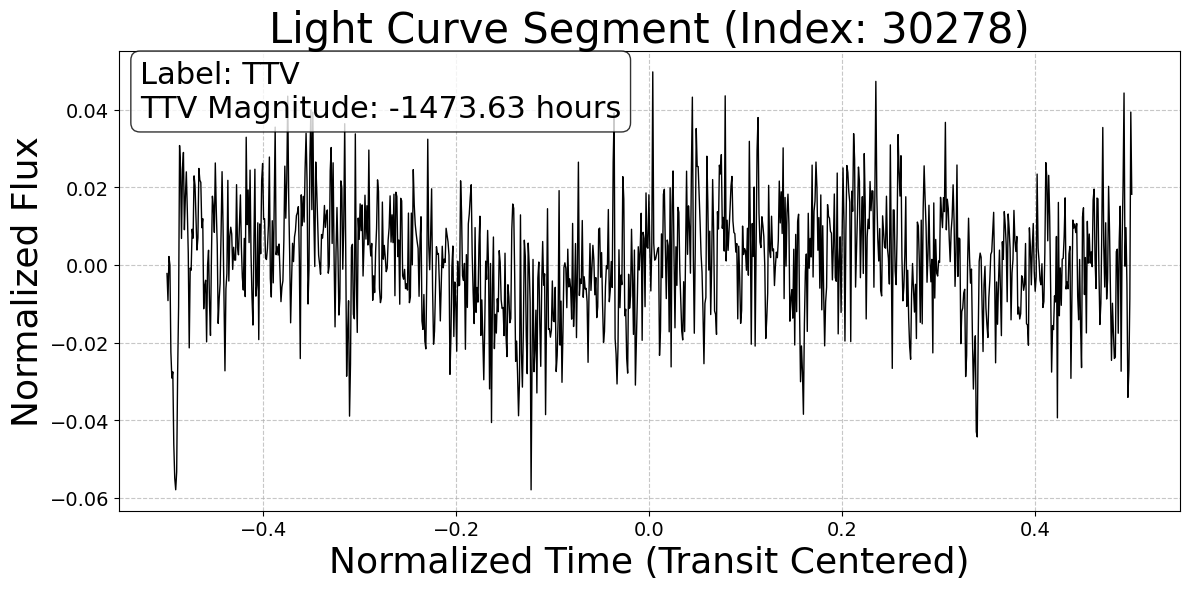

In [21]:
import numpy as np
import matplotlib.pyplot as plt

file_path = '../ml_data/ttv_detection_data.npz' 
data = np.load(file_path)
X = data['X']
y = data['y']
ttvs = data['ttvs']

# X is already preprocessed, so we don't need to normalize it again
X = (X - np.mean(X)) / np.std(X)

idx = 30278

# Calculate time array based on the length of X[idx]
time = np.linspace(-0.5, 0.5, len(X[idx].flatten()))

plt.figure(figsize=(12, 6))
plt.plot(time, X[idx].flatten(), 'k-', linewidth=1)
plt.title(f'Light Curve Segment (Index: {idx})', fontsize=30)
plt.xlabel('Normalized Time (Transit Centered)', fontsize=26)
plt.ylabel('Normalized Flux', fontsize=26)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=14)

# Add text box with additional information
text_box = f'Label: {"TTV" if y[idx] else "No TTV"}\nTTV Magnitude: {ttvs[idx]:.2f} hours'
plt.text(0.02, 0.98, text_box, transform=plt.gca().transAxes, fontsize=22,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()

plt.savefig('input.png', dpi=300)

plt.show()

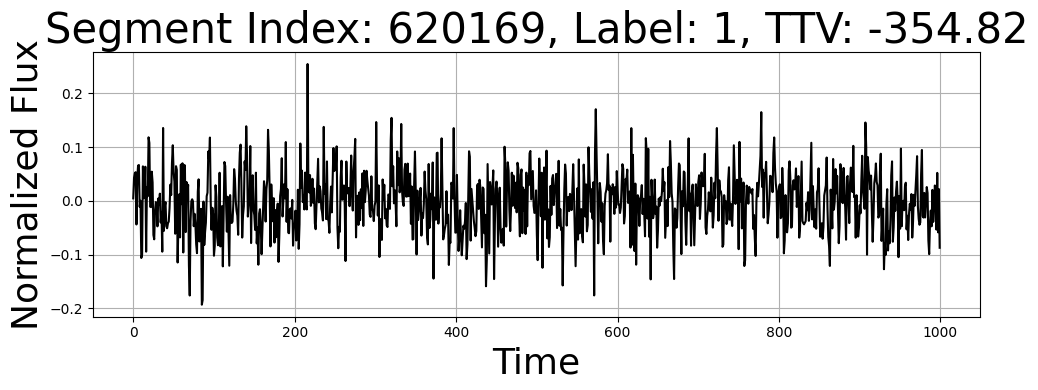

In [9]:
data = np.load(file_path)
X = data['X']
y = data['y']
ttvs = data['ttvs']

X = (X - np.mean(X)) / np.std(X)

idx = random.randint(0, X.shape[0] - 1)
# idx = 230373

plt.figure(figsize=(10, 4))
plt.plot(X[idx].flatten(), 'k-', markersize=1)
plt.title(f'Segment Index: {idx}, Label: {y[idx]}, TTV: {ttvs[idx]:.2f}', fontsize=30)
plt.xlabel('Time', fontsize=26)
plt.ylabel('Normalized Flux', fontsize=26)
plt.grid(True)
plt.tight_layout()

plt.savefig('input_segment3.png')

plt.show()


In [11]:
file_path = '../ml_data/ttv_detection_data.npz' 
data = np.load(file_path)

In [15]:
data

NpzFile '../ml_data/ttv_detection_data.npz' with keys: X

Total samples: 769557
Samples with significant TTVs: 298451
Percentage of samples with significant TTVs: 38.78%

TTV Amplitude Statistics:
Mean TTV amplitude: 721.7966
Median TTV amplitude: 393.1840
Max TTV amplitude: 23678.7882
Min TTV amplitude: 0.0000


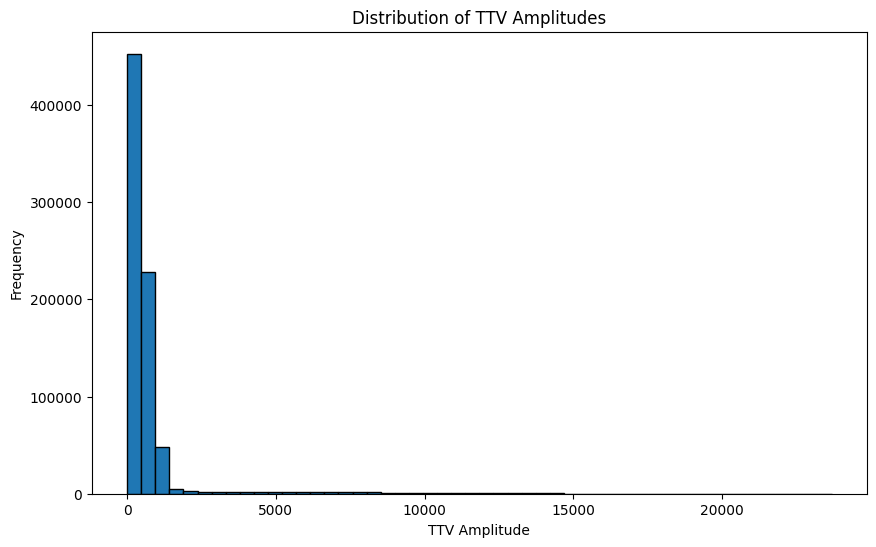

In [11]:
import numpy as np

# Load the .npz file
data = np.load('../ml_data/ttv_detection_data.npz')

# Extract the TTV data
ttvs = data['ttvs']

# Determine the threshold for significant TTVs
# You may need to adjust this based on your specific criteria
ttv_threshold = 500.0  # Assuming any non-zero value indicates significant TTV

# Count samples with significant TTVs
significant_ttv_count = np.sum(np.abs(ttvs) > ttv_threshold)

# Calculate total number of samples
total_samples = len(ttvs)

# Calculate percentage
ttv_percentage = (significant_ttv_count / total_samples) * 100

print(f"Total samples: {total_samples}")
print(f"Samples with significant TTVs: {significant_ttv_count}")
print(f"Percentage of samples with significant TTVs: {ttv_percentage:.2f}%")

# If you want to see the distribution of TTV amplitudes
print("\nTTV Amplitude Statistics:")
print(f"Mean TTV amplitude: {np.mean(np.abs(ttvs)):.4f}")
print(f"Median TTV amplitude: {np.median(np.abs(ttvs)):.4f}")
print(f"Max TTV amplitude: {np.max(np.abs(ttvs)):.4f}")
print(f"Min TTV amplitude: {np.min(np.abs(ttvs)):.4f}")

# Plot a histogram of TTV amplitudes
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(np.abs(ttvs), bins=50, edgecolor='black')
plt.title('Distribution of TTV Amplitudes')
plt.xlabel('TTV Amplitude')
plt.ylabel('Frequency')
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Elliptical function definition
def ellipse(x, h, k, a, b):
    return k + b * np.sqrt(1 - ((x - h) / a) ** 2)

# Load the .npz file
file_path = '../ml_data/ttv_detection_data.npz'
data = np.load(file_path)
X = data['X']
y = data['y']
ttvs = data['ttvs']

# Normalize X if not already done
# X = (X - np.mean(X)) / np.std(X)  # Assuming X is already preprocessed

# Define the time array based on the length of X
time = np.linspace(-0.5, 0.5, X.shape[1])  # Assuming X.shape[1] is the length of each light curve

# Initialize variables
fitted_params = None
r_squared_value = None
first_successful_idx = None

# Iterate over each light curve in the dataset
for i in range(X.shape[0]):
    x_data = time
    y_data = X[i].flatten()  # Flatten to ensure it's a 1D array

    # Initial guess for the parameters (h, k, a, b)
    initial_guess = (np.mean(x_data), np.mean(y_data), np.ptp(x_data) / 2, np.ptp(y_data) / 2)

    try:
        # Curve fitting
        params, _ = curve_fit(ellipse, x_data, y_data, p0=initial_guess)

        # Generate fitted ellipse data
        y_fit = ellipse(x_data, *params)

        # Goodness of fit assessment (R-squared)
        residuals = y_data - y_fit
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y_data - np.mean(y_data))**2)
        r_squared = 1 - (ss_res / ss_tot)

        # Check if the fit is successful
        if r_squared > 0.9:  # You can adjust this threshold as needed
            fitted_params = params
            r_squared_value = r_squared
            first_successful_idx = i
            break

    except Exception as e:
        continue  # Skip to the next light curve if the fitting fails

# If a successful fit was found, plot the light curve and fitted ellipse
if first_successful_idx is not None:
    print(f'First successful ellipse fit found at index: {first_successful_idx}')
    print(f'Fitted Parameters: {fitted_params}')
    print(f'R-squared: {r_squared_value:.4f}')
        
    plt.figure(figsize=(12, 6))
    plt.plot(time, X[first_successful_idx].flatten(), 'k-', linewidth=1, label='Observed Data')
    plt.plot(time, ellipse(time, *fitted_params), 'r--', linewidth=2, label='Fitted Ellipse')
    plt.title(f'Light Curve Segment (Index: {first_successful_idx})', fontsize=20)
    plt.xlabel('Normalized Time (Transit Centered)', fontsize=16)
    plt.ylabel('Normalized Flux', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(axis='both', which='major', labelsize=14)

    # Add text box with additional information
    text_box = f'Label: {"TTV" if y[first_successful_idx] else "No TTV"}\nTTV Magnitude: {ttvs[first_successful_idx]:.2f} hours\nR-squared: {r_squared_value:.4f}'
    plt.text(0.02, 0.98, text_box, transform=plt.gca().transAxes, fontsize=14,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.savefig('first_successful_fit.png', dpi=300)
    plt.show()
else:
    print('No successful elliptical fit was found.')

/var/folders/tq/959jvtp55m5fhl683mfrqnb40000gn/T/ipykernel_18007/2324743001.py:7: RuntimeWarning: invalid value encountered in sqrt
  return k + b * np.sqrt(1 - ((x - h) / a) ** 2)
/var/folders/tq/959jvtp55m5fhl683mfrqnb40000gn/T/ipykernel_18007/2324743001.py:37: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(ellipse, x_data, y_data, p0=initial_guess)


No successful elliptical fit was found.


Found significant TTV at index 4 with TTV magnitude 351.22 hours.


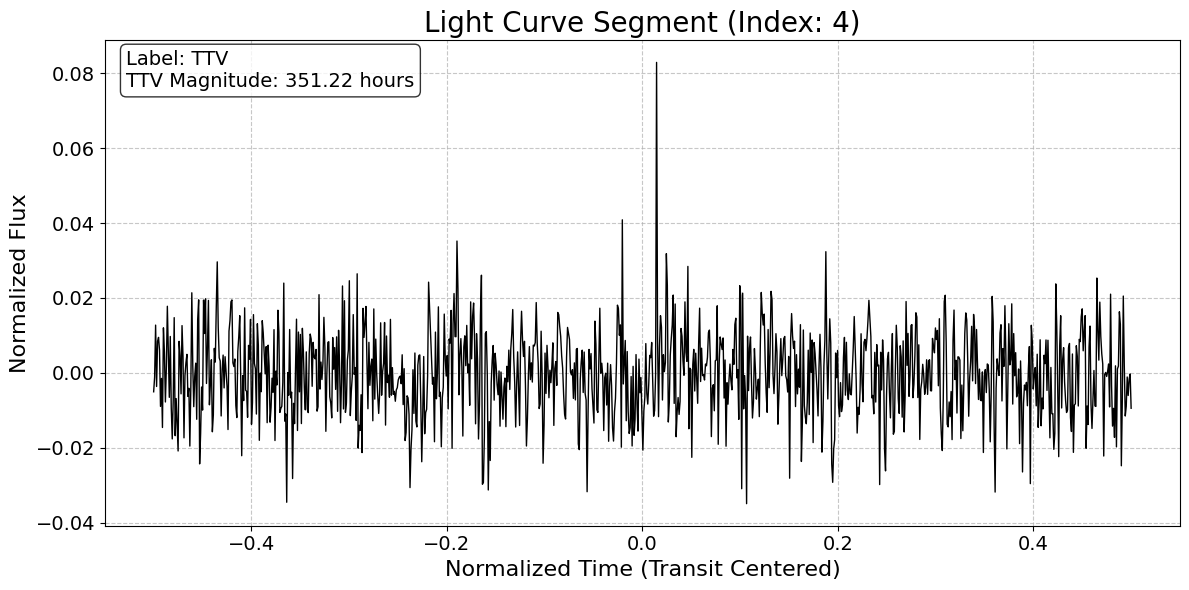

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '../ml_data/ttv_detection_data.npz' 
data = np.load(file_path)
X = data['X']
y = data['y']
ttvs = data['ttvs']

# Normalize the dataset (optional, since X is already preprocessed)
X = (X - np.mean(X)) / np.std(X)

# Find a light curve with a significant TTV feature
# You can define "significant" based on the TTV magnitude
significant_ttv_threshold = 1.0  # Define your threshold (in hours)

# Iterate over the dataset to find a suitable light curve
for idx in range(len(X)):
    if y[idx] == 1 and ttvs[idx] > significant_ttv_threshold:
        # If a significant TTV is found, plot the light curve
        print(f"Found significant TTV at index {idx} with TTV magnitude {ttvs[idx]:.2f} hours.")
        
        # Calculate time array based on the length of X[idx]
        time = np.linspace(-0.5, 0.5, len(X[idx].flatten()))

        # Plot the light curve
        plt.figure(figsize=(12, 6))
        plt.plot(time, X[idx].flatten(), 'k-', linewidth=1)
        plt.title(f'Light Curve Segment (Index: {idx})', fontsize=20)
        plt.xlabel('Normalized Time (Transit Centered)', fontsize=16)
        plt.ylabel('Normalized Flux', fontsize=16)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tick_params(axis='both', which='major', labelsize=14)

        # Add text box with additional information
        text_box = f'Label: {"TTV" if y[idx] else "No TTV"}\nTTV Magnitude: {ttvs[idx]:.2f} hours'
        plt.text(0.02, 0.98, text_box, transform=plt.gca().transAxes, fontsize=14,
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        plt.tight_layout()

        # Save and show the plot
        plt.savefig(f'preprocessed_light_curve_segment_{idx}.png', dpi=300)
        plt.show()

        break  # Stop after finding and plotting the first significant TTV


Possible eclipse found at index 64 with minimum flux -0.35.


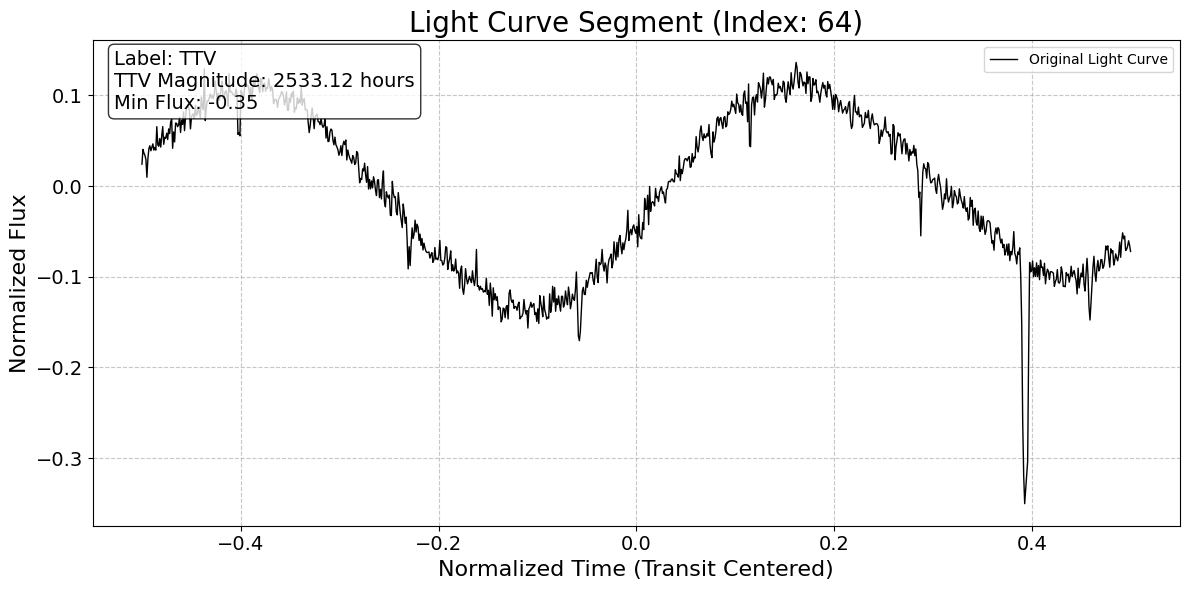

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Load the data
file_path = '../ml_data/ttv_detection_data.npz' 
data = np.load(file_path)
X = data['X']
y = data['y']
ttvs = data['ttvs']

# Normalize the dataset (optional, since X is already preprocessed)
X = (X - np.mean(X)) / np.std(X)

# Define a threshold for detecting a possible eclipse
eclipse_threshold = -0.1  # Stricter threshold for a significant dip in flux
min_flux_threshold = -0.35  # Minimum flux value for stricter validation
smoothing_window = 5  # Smoothing window size, adjust as needed

# Iterate over the dataset to find a light curve that shows a possible eclipse
for idx in range(len(X)):
    # Flatten the light curve and smooth it
    light_curve = X[idx].flatten()
    smoothed_light_curve = uniform_filter1d(light_curve, size=smoothing_window)

    if np.min(smoothed_light_curve) < eclipse_threshold and np.min(light_curve) < min_flux_threshold:
        print(f"Possible eclipse found at index {idx} with minimum flux {np.min(light_curve):.2f}.")
        
        # Calculate time array based on the length of X[idx]
        time = np.linspace(-0.5, 0.5, len(light_curve))

        # Plot the light curve
        plt.figure(figsize=(12, 6))
        plt.plot(time, light_curve, 'k-', linewidth=1, label='Original Light Curve')
        plt.title(f'Light Curve Segment (Index: {idx})', fontsize=20)
        plt.xlabel('Normalized Time (Transit Centered)', fontsize=16)
        plt.ylabel('Normalized Flux', fontsize=16)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tick_params(axis='both', which='major', labelsize=14)
        plt.legend()

        # Add text box with additional information
        text_box = f'Label: {"TTV" if y[idx] else "No TTV"}\nTTV Magnitude: {ttvs[idx]:.2f} hours\nMin Flux: {np.min(light_curve):.2f}'
        plt.text(0.02, 0.98, text_box, transform=plt.gca().transAxes, fontsize=14,
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        plt.tight_layout()

        # Save and show the plot
        plt.savefig(f'eclipse_light_curve_segment_{idx}.png', dpi=300)
        plt.show()

        break  # Stop after finding and plotting the first potential eclipse


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file_path = '../ml_data/ttv_detection_data.npz' 
data = np.load(file_path)
X = data['X']
y = data['y']
ttvs = data['ttvs']

# X is already preprocessed, so we don't need to normalize it again
X = (X - np.mean(X)) / np.std(X)

idx = 64

# Calculate time array based on the length of X[idx]
time = np.linspace(-0.5, 0.5, len(X[idx].flatten()))

plt.figure(figsize=(12, 6))
plt.plot(time, X[idx].flatten(), 'k-', linewidth=1)
plt.title(f'Light Curve Segment (Index: {idx})', fontsize=30)
plt.xlabel('Normalized Time (Transit Centered)', fontsize=26)
plt.ylabel('Normalized Flux', fontsize=26)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=14)

# Add text box with additional information
text_box = f'Label: {"TTV" if y[idx] else "No TTV"}\nTTV Magnitude: {ttvs[idx]:.2f} hours'
plt.text(0.02, 0.98, text_box, transform=plt.gca().transAxes, fontsize=22,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()

plt.savefig('preprocessed_light_curve_segment.png', dpi=300)

plt.show()

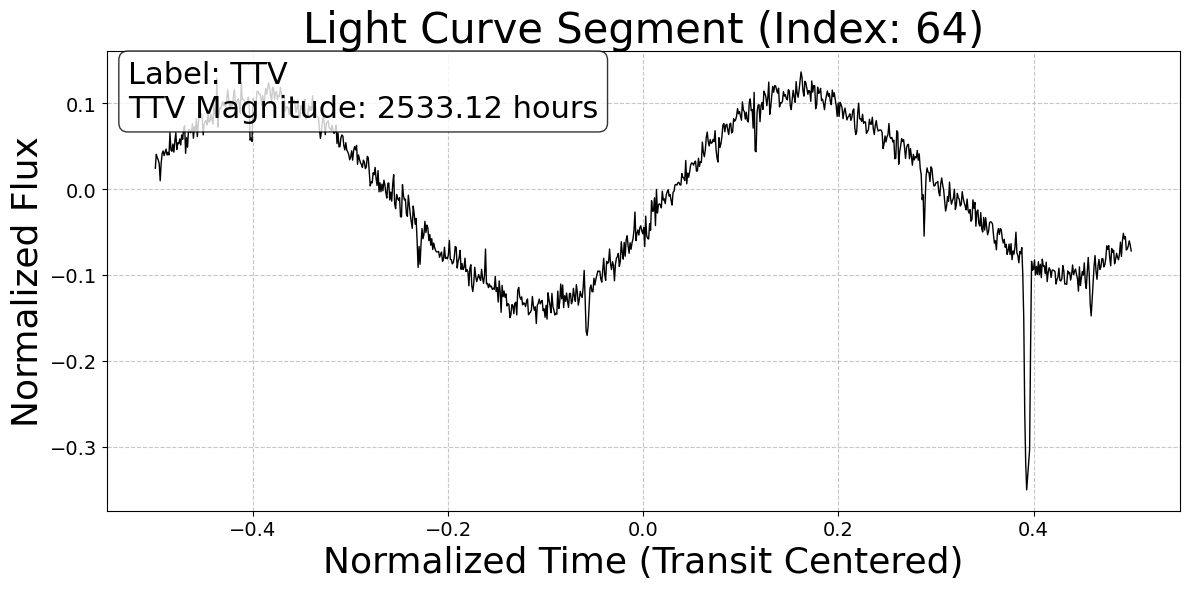

In [1]:
import numpy as np
import matplotlib.pyplot as plt

file_path = '../ml_data/ttv_detection_data.npz' 
data = np.load(file_path)
X = data['X']
y = data['y']
ttvs = data['ttvs']

# X is already preprocessed, so we don't need to normalize it again
X = (X - np.mean(X)) / np.std(X)

idx = 64

# Calculate time array based on the length of X[idx]
time = np.linspace(-0.5, 0.5, len(X[idx].flatten()))

plt.figure(figsize=(12, 6))
plt.plot(time, X[idx].flatten(), 'k-', linewidth=1)
plt.title(f'Light Curve Segment (Index: {idx})', fontsize=30)
plt.xlabel('Normalized Time (Transit Centered)', fontsize=26)
plt.ylabel('Normalized Flux', fontsize=26)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=14)

# Add text box with additional information
text_box = f'Label: {"TTV" if y[idx] else "No TTV"}\nTTV Magnitude: {ttvs[idx]:.2f} hours'
plt.text(0.02, 0.98, text_box, transform=plt.gca().transAxes, fontsize=22,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()

plt.savefig('preprocessed_light_curve_segment.png', dpi=300)

plt.show()